# Major Project 2 - Cognitive Application

## Google App Rating - Data Analysis

There are more than 3.04 million apps found on Google Play Store. With this
project /article we want you to take us through a journey of analyzing various
apps found on the play store with the help of different python libraries.
Dataset: The dataset is been taken from Kaggle, which can be found in the
attachments.

App rating, reviews, price, and installs have been analyzed against their
respective categories. Dataset has been cleaned and downloaded from
Kaggle.
You must present an entire overview of the relationship between all the
parameters and how do they add to the efficiency of the product. (Compare
the parameters to analyze the profit margins of the application)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

From the above data,
- Rating, Type, Content Rating, Current Ver, Android Var has missing values

In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Filtering and Cleaning

In [7]:
df[df['Reviews'] == '3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
for i in range(len(df.columns)-1,1,-1):
    df.loc[[df[df['Category']=='1.9'].index[0]],[df.columns[i]]]=df.loc[[df[df['Category']=='1.9'].index[0]],[df.columns[i-1]]].values
df.loc[[df[df['Category']=='1.9'].index[0]],['Category']]='ART_AND_DESIGN'

In [9]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                   ART_AND_DESIGN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [10]:
df['Reviews']=df['Reviews'].astype(int)

In [11]:
df['Price'].replace(to_replace='0', value='$0', inplace=True)
df['Price'] = df['Price'].apply(lambda a : a[1:])
df['Price'] = df['Price'].astype(float)

In [12]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [13]:
df['Size'].replace(to_replace="Varies with device", value="0M", inplace=True)
df['Size']=df['Size'].apply(lambda a : a.replace(',',''))

In [14]:
df['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839      0M
10840     19M
Name: Size, Length: 10841, dtype: object

In [15]:
df['Value']=df['Size'].apply(lambda a : a[:-1])
df['Unit']=df['Size'].apply(lambda a : a[-1:])
df['Value']=df['Value'].astype(float)

In [16]:
df[['Value', 'Unit']].head()

,Value,Unit
0,19.0,M
1,14.0,M
2,8.7,M
3,25.0,M
4,2.8,M


In [17]:
df['Installs'].replace(to_replace='0',value='0+',inplace=True)
df['Installs']=df['Installs'].apply(lambda a : a.replace(',',''))

df['Installs']=df['Installs'].apply(lambda a : a[:-1])
df['Installs']=df['Installs'].astype(int)

In [18]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

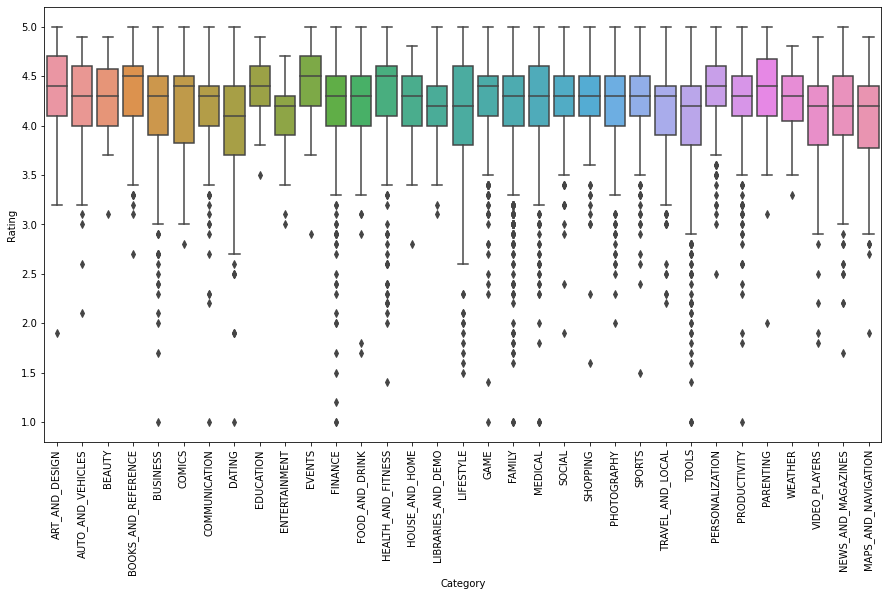

In [19]:
df['Rating'] = df['Rating'].astype(float)
plt.figure(figsize=(15, 8))
sns.boxplot(x="Category", y="Rating", data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

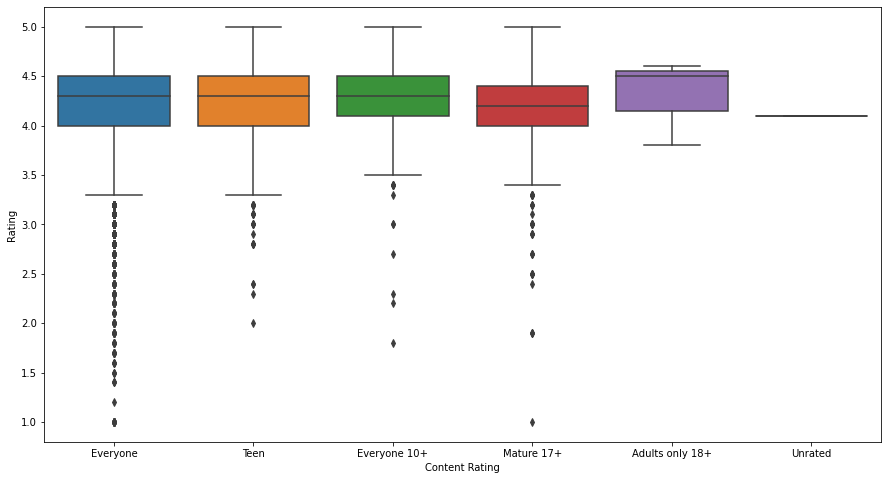

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Content Rating", y="Rating", data=df)

In [21]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [22]:
df[df['Genres'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,1.9,19,3.0M,1000,Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,3.0,M


In [23]:
df.loc[[df[df['Genres'].isnull()].index[0]],['Genres']]='Art & Design'

In [24]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0M,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0,M


In [25]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [26]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,11.0,M
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN,2.1,M


In [27]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [28]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,2.7,M
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,11.0,k
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,8.7,M
6803,BT Master,FAMILY,NaN,0,222k,100,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up,222.0,k
7333,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,14.0,M
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,7.2,M
7730,UFO-CQ,TOOLS,NaN,1,237k,10,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,237.0,k
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,1000,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,658.0,k


In [29]:
temp=pd.DataFrame()
for i in df['Category'].unique():
    temp1=df[(df['Category']==i)]['Rating'].fillna(df[(df['Category']==i)]['Rating'].mode()[0])
    temp=pd.concat([temp,temp1])

In [30]:
df['Rating']=temp

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int32  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10841 non-null  object 
 13  Value           10841 non-null  float64
 14  Unit            10841 non-null  object 
dtypes: float64(3), int32(2), object(10)
memory usage: 1.2+ MB


if required we can drop the NA values in Current Ver.

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

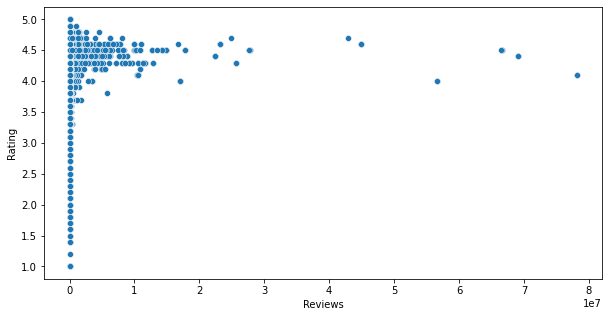

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Reviews',y='Rating',data=df)

<AxesSubplot:xlabel='Price', ylabel='Reviews'>

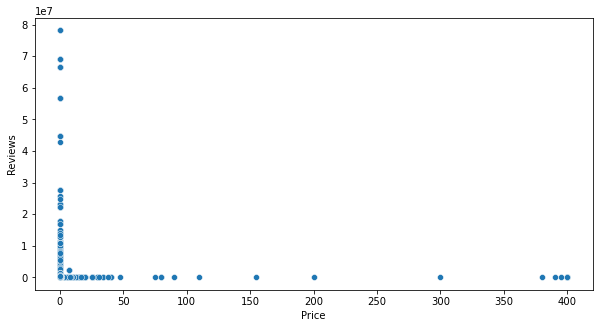

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Price',y='Reviews',data=df)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

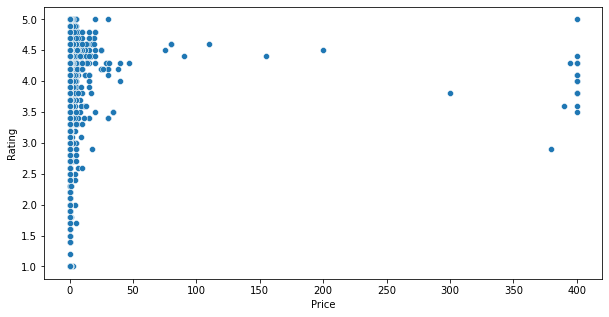

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Price',y='Rating',data=df)

<AxesSubplot:>

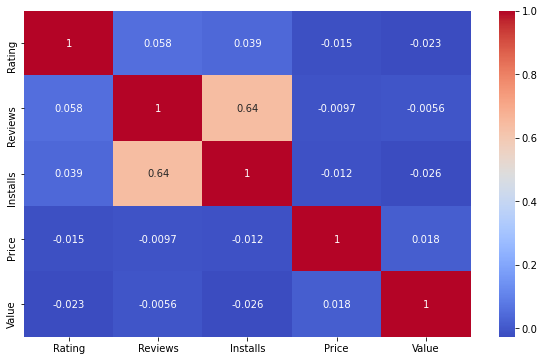

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## App with Largest Size

In [36]:
app_size=df[['App','Size','Value','Unit']]

In [37]:
app_size.head()

,App,Size,Value,Unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,19M,19.0,M
1,Coloring book moana,14M,14.0,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7M,8.7,M
3,Sketch - Draw & Paint,25M,25.0,M
4,Pixel Draw - Number Art Coloring Book,2.8M,2.8,M


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unit', ylabel='count'>

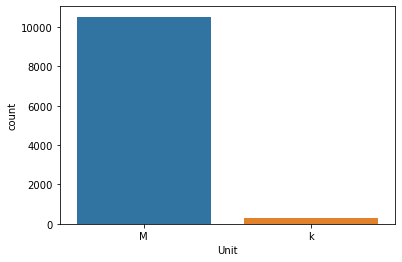

In [38]:
sns.countplot(app_size['Unit'])

In [39]:
app_size[app_size['Unit']=='M'].sort_values('Value',ascending=False)[['App','Size']].head(20)

,App,Size
1793,Mini Golf King - Multiplayer Game,100M
1565,Talking Babsy Baby: Baby Games,100M
8409,Car Crash III Beam DH Real Damage Simulator 2018,100M
9170,Stickman Legends: Shadow Wars,100M
5865,Gangster Town: Vice District,100M
1988,Hungry Shark Evolution,100M
5862,Miami crime simulator,100M
1080,Post Bank,100M
5530,The Walking Dead: Our World,100M
5427,Ultimate Tennis,100M


## App with Largest Number of Installation

In [40]:
app_inst=df[['App','Installs']]

In [41]:
app_inst.head()

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000
1,Coloring book moana,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000
3,Sketch - Draw & Paint,50000000
4,Pixel Draw - Number Art Coloring Book,100000


In [42]:
app_inst.sort_values('Installs',ascending=False).head(10)

,App,Installs
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000
2884,Google Photos,1000000000
3665,YouTube,1000000000
2853,Google Photos,1000000000
4234,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000


## App with large number of Reviews

In [43]:
app_rev=df[['App','Reviews']]

In [44]:
app_rev.sort_values('Reviews',ascending=False).head(10)

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
381,WhatsApp Messenger,69119316
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2611,Instagram,66577313
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578


## Most Popular Category

In [45]:
app_grp=df.groupby('Category')

In [46]:
grp=app_grp.mean()
grp['Count']=app_grp['App'].count()

### Popularity based on Customer Preference

In [47]:
grp.sort_values(['Reviews','Rating'],ascending=False).head()

,Rating,Reviews,Installs,Price,Value,Count
Category,,,,,,
COMMUNICATION,4.180103,2.107138e+06,8.435989e+07,0.214832,38.200258,387
SOCIAL,4.261017,2.105903e+06,4.769447e+07,0.054136,18.658983,295
GAME,4.295105,1.385859e+06,3.066960e+07,0.251136,40.633042,1144
PHOTOGRAPHY,4.197910,6.373631e+05,3.011417e+07,0.400627,16.111642,335
VIDEO_PLAYERS,4.084000,6.307439e+05,3.555430e+07,0.059771,16.493143,175


### Popularity based on App Development

In [48]:
grp.sort_values(['Count'],ascending=False).head()

,Rating,Reviews,Installs,Price,Value,Count
Category,,,,,,
FAMILY,4.204564,2.080255e+05,5.201959e+06,1.234675,35.309381,1972
GAME,4.295105,1.385859e+06,3.066960e+07,0.251136,40.633042,1144
TOOLS,4.067141,3.240629e+05,1.358573e+07,0.317023,41.882681,843
MEDICAL,4.265011,3.425432e+03,1.150269e+05,3.110065,41.708855,463
BUSINESS,4.216522,3.033598e+04,2.178076e+06,0.402761,23.150000,460


## Paid vs Free

<AxesSubplot:xlabel='Type', ylabel='count'>

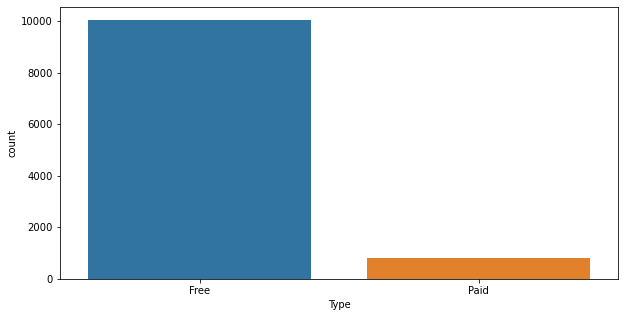

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Type", data=df)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

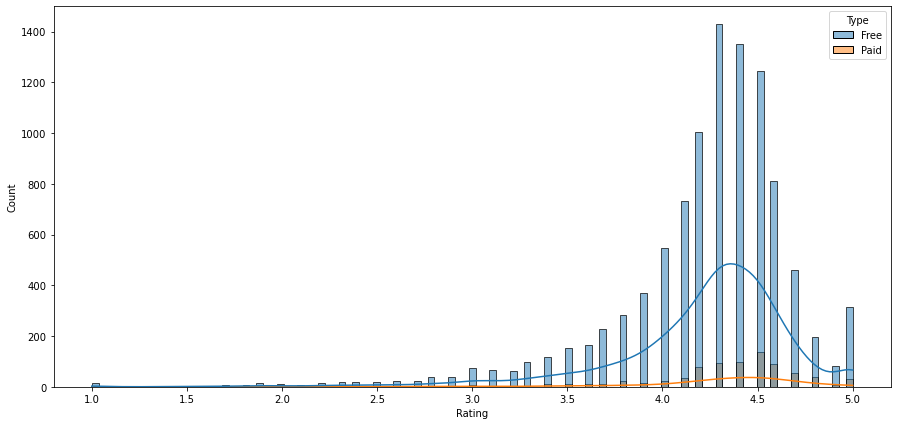

In [50]:
plt.figure(figsize=(15,7))
sns.histplot(x='Rating',hue='Type',data=df,kde=True)

In [51]:
type_grp=df.groupby('Type')
type_grp=type_grp.mean()
type_grp['Count']=df.groupby('Type')['App'].count()
type_grp

,Rating,Reviews,Installs,Price,Value,Count
Type,,,,,,
Free,4.214779,478565.756598,1.668763e+07,0.000000,29.492889,10041
Paid,4.291625,11673.312500,9.119510e+04,13.920837,53.192500,800


<AxesSubplot:xlabel='Type', ylabel='Rating'>

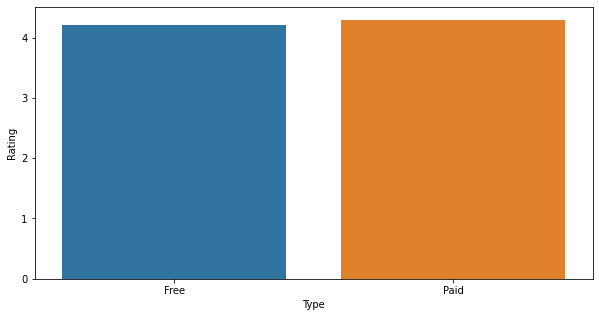

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=type_grp.index,y='Rating',data=type_grp)

## Most Downloads on the latest update Year 2010 to 2018

In [53]:
app_year=df[['App','Installs','Reviews','Rating','Last Updated']]
app_year

,App,Installs,Reviews,Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,159,4.1,"January 7, 2018"
1,Coloring book moana,500000,967,3.9,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,87510,4.7,"August 1, 2018"
3,Sketch - Draw & Paint,50000000,215644,4.5,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,100000,967,4.3,"June 20, 2018"
...,...,...,...,...,...
10836,Sya9a Maroc - FR,5000,38,4.5,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,100,4,5.0,"July 6, 2018"
10838,Parkinson Exercices FR,1000,3,4.5,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,1000,114,4.5,"January 19, 2015"


In [54]:
app_year['Year']=app_year['Last Updated'].apply(lambda a : a[-4:])
app_year['Year']=app_year['Year'].astype(int)
app_year.head()

<ipython-input-54-73fd4686c2c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_year['Year']=app_year['Last Updated'].apply(lambda a : a[-4:])
<ipython-input-54-73fd4686c2c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_year['Year']=app_year['Year'].astype(int)


,App,Installs,Reviews,Rating,Last Updated,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,159,4.1,"January 7, 2018",2018
1,Coloring book moana,500000,967,3.9,"January 15, 2018",2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,87510,4.7,"August 1, 2018",2018
3,Sketch - Draw & Paint,50000000,215644,4.5,"June 8, 2018",2018
4,Pixel Draw - Number Art Coloring Book,100000,967,4.3,"June 20, 2018",2018


In [55]:
year_grp=app_year.sort_values(['Installs','Reviews'],ascending=False).groupby('Year')
year_grp.first().sort_index(ascending=False)

,App,Installs,Reviews,Rating,Last Updated
Year,,,,,
2018,Facebook,1000000000,78158306,4.1,"August 3, 2018"
2017,Geometry Dash Lite,100000000,6181640,4.5,"December 22, 2017"
2016,Vector,100000000,3058687,4.4,"July 18, 2016"
2015,Smash Hit,100000000,4147718,4.5,"November 26, 2015"
2014,Five Nights at Freddy's 2 Demo,50000000,1503544,4.3,"November 15, 2014"
2013,SpongeBob Diner Dash,50000000,576210,4.0,"August 22, 2013"
2012,Aviary Stickers: Free Pack,10000000,126862,3.5,"January 17, 2012"
2011,CONTRACT KILLER: ZOMBIES,5000000,144545,4.4,"December 1, 2011"
2010,FML F*ck my life + widget,100000,1415,4.2,"May 21, 2010"


In [56]:
year_grp=app_year.sort_values(['Reviews','Installs'],ascending=False).groupby('Year')
year_grp.first().sort_index(ascending=False)

,App,Installs,Reviews,Rating,Last Updated
Year,,,,,
2018,Facebook,1000000000,78158306,4.1,"August 3, 2018"
2017,Geometry Dash Lite,100000000,6181640,4.5,"December 22, 2017"
2016,Vector,100000000,3058687,4.4,"July 18, 2016"
2015,Smash Hit,100000000,4147718,4.5,"November 26, 2015"
2014,FRONTLINE COMMANDO: D-DAY,10000000,1736105,4.5,"May 16, 2014"
2013,FRONTLINE COMMANDO,10000000,1351833,4.4,"October 28, 2013"
2012,Aviary Stickers: Free Pack,10000000,126862,3.5,"January 17, 2012"
2011,CONTRACT KILLER: ZOMBIES,5000000,144545,4.4,"December 1, 2011"
2010,FML F*ck my life + widget,100000,1415,4.2,"May 21, 2010"


## Prediction Model

### PreProcessing

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
required_data=df[['App', 'Category', 'Reviews', 'Installs','Price', 'Content Rating','Value', 'Unit','Genres']]
target=df['Rating']
target.index=df['App']

In [59]:
required_data['Year']=df['Last Updated'].apply(lambda a : a[-4:])
required_data['Year']=required_data['Year'].astype(int)

<ipython-input-59-56c2b66380dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['Year']=df['Last Updated'].apply(lambda a : a[-4:])
<ipython-input-59-56c2b66380dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_data['Year']=required_data['Year'].astype(int)


In [60]:
required_data.set_index('App',inplace=True)
required_data.head()

,Category,Reviews,Installs,Price,Content Rating,Value,Unit,Genres,Year
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,10000,0.0,Everyone,19.0,M,Art & Design,2018
Coloring book moana,ART_AND_DESIGN,967,500000,0.0,Everyone,14.0,M,Art & Design;Pretend Play,2018
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,87510,5000000,0.0,Everyone,8.7,M,Art & Design,2018
Sketch - Draw & Paint,ART_AND_DESIGN,215644,50000000,0.0,Teen,25.0,M,Art & Design,2018
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,100000,0.0,Everyone,2.8,M,Art & Design;Creativity,2018


In [61]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Reviews         10841 non-null  int32  
 2   Installs        10841 non-null  int32  
 3   Price           10841 non-null  float64
 4   Content Rating  10841 non-null  object 
 5   Value           10841 non-null  float64
 6   Unit            10841 non-null  object 
 7   Genres          10841 non-null  object 
 8   Year            10841 non-null  int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 719.9+ KB


In [62]:
required_data=pd.get_dummies(required_data,columns=['Unit'],drop_first=True)

In [63]:
LE=LabelEncoder()
LE.fit(required_data['Content Rating'])
required_data['Content Rating']=LE.transform(required_data['Content Rating'])

In [64]:
LE.fit(required_data['Category'])
required_data['Category']=LE.transform(required_data['Category'])

In [65]:
LE.fit(required_data['Genres'])
required_data['Genres']=LE.transform(required_data['Genres'])

In [66]:
required_data.head()

,Category,Reviews,Installs,Price,Content Rating,Value,Genres,Year,Unit_k
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0,159,10000,0.0,1,19.0,9,2018,0
Coloring book moana,0,967,500000,0.0,1,14.0,12,2018,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0,87510,5000000,0.0,1,8.7,9,2018,0
Sketch - Draw & Paint,0,215644,50000000,0.0,4,25.0,9,2018,0
Pixel Draw - Number Art Coloring Book,0,967,100000,0.0,1,2.8,11,2018,0


In [67]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  int32  
 1   Reviews         10841 non-null  int32  
 2   Installs        10841 non-null  int32  
 3   Price           10841 non-null  float64
 4   Content Rating  10841 non-null  int32  
 5   Value           10841 non-null  float64
 6   Genres          10841 non-null  int32  
 7   Year            10841 non-null  int32  
 8   Unit_k          10841 non-null  uint8  
dtypes: float64(2), int32(6), uint8(1)
memory usage: 518.8+ KB


In [68]:
required_data.shape

(10841, 9)

### Model creation and prediction

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [70]:
sc=StandardScaler()
sc.fit(required_data)
required_data_sc=sc.transform(required_data)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(required_data_sc, target, test_size=0.3)

In [72]:
prediction=pd.DataFrame(y_test)
prediction.head()

,Rating
App,
I Am Rich Pro,4.4
PlugShare,4.7
FINAL FANTASY BRAVE EXVIUS,4.6
AU Results 2017 Auzone,3.8
Cisco Webex Teams,4.2


In [73]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [74]:
prediction['Linear_R']=LR.predict(X_test)
prediction['Linear_R']=round(prediction['Linear_R'],1)

In [75]:
print(np.sqrt(mean_squared_error(prediction['Rating'],prediction['Linear_R'])))

0.480562868052277


In [76]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [77]:
prediction['Lasso']=lasso.predict(X_test)
prediction['Lasso']=round(prediction['Lasso'],1)

In [78]:
print(np.sqrt(mean_squared_error(prediction['Rating'],prediction['Lasso'])))

0.4836649204798684


In [79]:
prediction.head(10)

,Rating,Linear_R,Lasso
App,,,
I Am Rich Pro,4.4,4.0,4.2
PlugShare,4.7,4.2,4.2
FINAL FANTASY BRAVE EXVIUS,4.6,4.2,4.2
AU Results 2017 Auzone,3.8,4.2,4.2
Cisco Webex Teams,4.2,4.3,4.2
Pick-a-Paint,1.6,4.3,4.2
DF 司機,4.2,4.2,4.2
BD All Results,4.1,4.2,4.2
DV-2019 UK/British,4.6,4.3,4.2


## Recommendation System

In [80]:
app_recom=df[(df['Installs']>1000) & (df['Reviews']>100)][['Category', 'Reviews','Rating', 'Installs','Price', 'Content Rating','Genres']]

In [81]:
app_recom=pd.get_dummies(app_recom,columns=['Category','Content Rating','Genres'],prefix='',prefix_sep='')

In [82]:
sc=StandardScaler()
sc.fit(app_recom)
app_recom=pd.DataFrame(sc.transform(app_recom))

In [83]:
app_recom.index=df[(df['Installs']>1000) & (df['Reviews']>100)]['App']

In [84]:
app_recom=app_recom.T
app_recom.head()

App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book,Paper flowers instructions,Smoke Effect Photo Maker - Smoke Editor,Infinite Painter,Garden Coloring Book,Kids Paint Free - Drawing Fun,...,FR: My Secret Pets!,Golden Dictionary (FR-AR),HTC Sense Input - FR,Frim: get new friends on local chat rooms,Fr Agnel Ambarnath,Manga-FR - Anime Vostfr,Bulgarian French Dictionary Fr,News Minecraft.fr,FR Tides,iHoroscope - 2018 Daily Horoscope & Astrology
0,-0.184793,-0.184564,-0.160037,-0.123723,-0.184564,-0.184791,-0.184787,-0.174404,-0.180929,-0.184804,...,-0.184615,-0.183201,-0.184587,-0.159760,-0.184805,-0.184755,-0.184667,-0.184588,-0.184499,-0.071955
1,-0.287279,-0.780692,1.192962,0.699548,0.206135,0.452842,-1.027399,-0.287279,0.452842,1.192962,...,-0.533985,-0.040572,-0.533985,-0.533985,-0.040572,-2.014226,0.946255,-1.027399,-1.027399,0.699548
2,-0.222001,-0.217208,-0.173191,0.266984,-0.221121,-0.221610,-0.221610,-0.212317,-0.212317,-0.222001,...,-0.221610,-0.217208,-0.221121,-0.173191,-0.222050,-0.222001,-0.222001,-0.221121,-0.221121,-0.124282
3,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,...,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750,-0.050750
4,11.872722,11.872722,11.872722,11.872722,11.872722,11.872722,11.872722,11.872722,11.872722,11.872722,...,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227,-0.084227


In [85]:
app_recom.shape

(157, 7382)

In [86]:
for_app=app_recom['Do Not Crash']

In [87]:
recommend=pd.DataFrame(app_recom.corrwith(for_app),columns=['Correlation'])
recommend.sort_values('Correlation',ascending=False).head(10)

,Correlation
App,
Do Not Crash,1.000000
Egg: clicker,1.000000
Plastic Surgery Surgeon Simulator Er Doctor Games,0.999998
My Ex Girlfriend Comes Back,0.999998
SegPlay Mobile Paint by Number,0.999997
Hidden Object Florida Vacation Adventure Fun Game,0.999997
OMG Gross Zit - Date Nightmare,0.999931
King Burger Dash,0.999475
BJ-UFO,0.999475
